In [1]:
import pandas as pd
import numpy as np


def format_percentage(x):
    if isinstance(x, str):
        x = float(x)
    if np.isnan(x):
        return ""
    else:
        return "{:.1f}".format(x)
    
    
def latex_postprocess(latex:str):
    latex = latex.replace('vision_backbone', r'\textit{vision backbone}').replace('data_pct', r'\textit{data %}').replace('text_encoder', r'\textit{language model}')
    latex = latex.replace('biobert', 'BioBERT').replace('clinicalbert', 'ClinicalBERT').replace('pubmedbert', 'PubMedBERT').replace('cxrbert', 'CXR-BERT').replace('bert', 'BERT')
    latex = latex.replace('resnet-ae', 'ResNet-AE').replace('dinov2-s', 'DINOv2-S').replace('dinov2-b', 'DINOv2-B')
    latex = latex.replace('ResNet-AE', r'\textbf{ResNet-AE}').replace('DINOv2-S', r'\textbf{DINOv2-S}').replace('DINOv2-B', r'\textbf{DINOv2-B}')
    latex = latex.replace('%', '\%').replace('_', '\_')
    return latex


def construct_df(task, dataset, metric='dice'):
    df_raw = pd.read_csv(f'C:/Users/holaj/OneDrive - Imperial College London/Desktop/experiment-results/{task}_{dataset}.csv')

    data = np.zeros((5, 3, 3))  # language, vision, data_pct
    vision_models = ['resnet-ae', 'dinov2-s', 'dinov2-b']
    language_models = ['bert', 'biobert', 'clinicalbert', 'pubmedbert', 'cxrbert']
    data_pcts = [0.01, 0.1, 1.0]

    for cn in df_raw.columns:
        if cn == 'Step':
            continue
        if cn.endswith(f'test_{metric}'):
            dice = (df_raw[cn]).dropna().values.max()
            vision, language, dataset, data_pct = cn.split(' - ')[0].split('_')
            data_pct = float(data_pct)
            i, j, k = language_models.index(language), vision_models.index(vision), data_pcts.index(data_pct)
            data[i, j, k] = dice
            
    data = data.reshape(len(language_models), -1)
    data_pcts = [f'{pct:.0%}' for pct in data_pcts]
    midx = pd.MultiIndex.from_product([vision_models, data_pcts], names=['vision_backbone', 'data_pct'])
    df = pd.DataFrame(data*100, index=pd.Index(language_models, name='text_encoder'), columns=midx)
    # df.replace(0, np.nan, inplace=True)
    return df

## Main

### Segmentation

In [163]:
task = 'segment'
dataset = 'siim'
metric = 'dice'

df = construct_df(task, dataset)
df.style.set_caption(f"{task}_{dataset}: {metric}").format("{:.1f}")

In [164]:
df_formatted = df.applymap(format_percentage)
latex = df_formatted.to_latex(escape=False, multicolumn_format='c', multicolumn=True, na_rep='', 
                              caption=f"{task[0].upper()+task[1:]} results (Dice [%]) on {dataset.upper()} dataset.", 
                              label=f"tab:{task}-{dataset}-dice", longtable=False, position='H',bold_rows=True)
latex = latex_postprocess(latex)
print(latex)

\begin{table}[H]
\caption{Segment results (Dice [\%]) on SIIM dataset.}
\label{tab:segment-siim-dice}
\begin{tabular}{llllllllll}
\toprule
\textit{vision backbone} & \multicolumn{3}{c}{\textbf{ResNet-AE}} & \multicolumn{3}{c}{\textbf{DINOv2-S}} & \multicolumn{3}{c}{\textbf{DINOv2-B}} \\
\textit{data \%} & 1\% & 10\% & 100\% & 1\% & 10\% & 100\% & 1\% & 10\% & 100\% \\
\textit{language model} &  &  &  &  &  &  &  &  &  \\
\midrule
\textbf{BERT} & 73.1 & 73.1 & 73.0 & 53.1 & 58.7 & 73.7 & 51.8 & 56.8 & 73.3 \\
\textbf{BioBERT} & 73.1 & 73.1 & 73.1 & 60.8 & 58.3 & 72.9 & 46.4 & 51.3 & 72.9 \\
\textbf{ClinicalBERT} & 73.1 & 73.1 & 73.1 & 41.9 & 60.1 & 72.0 & 44.0 & 67.3 & 73.2 \\
\textbf{PubMedBERT} & 73.1 & 73.1 & 73.1 & 55.7 & 52.9 & 72.1 & 72.6 & 64.3 & 73.0 \\
\textbf{CXR-BERT} & 73.1 & 73.1 & 73.1 & 57.4 & 66.9 & 71.9 & 62.1 & 61.0 & 73.6 \\
\bottomrule
\end{tabular}
\end{table}



In [165]:
task = 'segment'
dataset = 'rsna'
metric = 'dice'

df = construct_df(task, dataset)
df.style.set_caption(f"{task}_{dataset}: {metric}").format("{:.1f}")

In [166]:
df_formatted = df.applymap(format_percentage)
latex = df_formatted.to_latex(escape=False, multicolumn_format='c', multicolumn=True, na_rep='', 
                              caption=f"{task[0].upper()+task[1:]} results (Dice [%]) on {dataset.upper()} dataset.", 
                              label=f"tab:{task}-{dataset}-dice", longtable=False, position='H',bold_rows=True)
latex = latex_postprocess(latex)
print(latex)

\begin{table}[H]
\caption{Segment results (Dice [\%]) on RSNA dataset.}
\label{tab:segment-rsna-dice}
\begin{tabular}{llllllllll}
\toprule
\textit{vision backbone} & \multicolumn{3}{c}{\textbf{ResNet-AE}} & \multicolumn{3}{c}{\textbf{DINOv2-S}} & \multicolumn{3}{c}{\textbf{DINOv2-B}} \\
\textit{data \%} & 1\% & 10\% & 100\% & 1\% & 10\% & 100\% & 1\% & 10\% & 100\% \\
\textit{language model} &  &  &  &  &  &  &  &  &  \\
\midrule
\textbf{BERT} & 76.5 & 69.5 & 76.4 & 56.0 & 71.6 & 78.1 & 55.9 & 74.1 & 77.2 \\
\textbf{BioBERT} & 76.5 & 69.9 & 75.5 & 61.7 & 70.9 & 77.8 & 62.4 & 74.3 & 76.8 \\
\textbf{ClinicalBERT} & 76.5 & 74.4 & 76.4 & 50.1 & 73.5 & 78.0 & 59.5 & 73.6 & 77.2 \\
\textbf{PubMedBERT} & 76.5 & 74.3 & 76.2 & 61.6 & 70.9 & 77.5 & 59.1 & 72.8 & 77.2 \\
\textbf{CXR-BERT} & 76.5 & 71.4 & 76.1 & 68.5 & 73.6 & 77.5 & 52.0 & 72.4 & 76.7 \\
\bottomrule
\end{tabular}
\end{table}



In [16]:
task = 'segment'
dataset = 'rsna_1'
metric = 'dice'

df = construct_df(task, dataset)
df.style.set_caption(f"{task}_{dataset}: {metric}").format("{:.1f}")

In [ ]:
task = 'classification'
dataset = 'covidx'
metric = 'accuracy'
df = construct_df(task, dataset, metric)
df.style.set_caption(f"{task}_{dataset}: {metric}").format("{:.1f}")

### Classification

In [26]:
task = 'classification'
dataset = 'covidx'
metric = 'accuracy'
df = construct_df(task, dataset, metric)
df.style.set_caption(f"{task}_{dataset}: {metric}").format("{:.1f}")

In [27]:
df_formatted = df.applymap(format_percentage)
latex = df_formatted.to_latex(escape=False, multicolumn_format='c', multicolumn=True, na_rep='', 
                              caption=f"{task[0].upper()+task[1:]} results (Dice [%]) on {dataset.upper()} dataset.", 
                              label=f"tab:{task}-{dataset}-dice", longtable=False, position='H',bold_rows=True)
latex = latex_postprocess(latex)
print(latex)

\begin{table}[H]
\caption{Classification results (Dice [\%]) on COVIDX dataset.}
\label{tab:classification-covidx-dice}
\begin{tabular}{llllllllll}
\toprule
\textit{vision backbone} & \multicolumn{3}{c}{\textbf{ResNet-AE}} & \multicolumn{3}{c}{\textbf{DINOv2-S}} & \multicolumn{3}{c}{\textbf{DINOv2-B}} \\
\textit{data \%} & 1\% & 10\% & 100\% & 1\% & 10\% & 100\% & 1\% & 10\% & 100\% \\
\textit{language model} &  &  &  &  &  &  &  &  &  \\
\midrule
\textbf{BERT} & 62.0 & 72.3 & 79.3 & 69.7 & 85.0 & 91.3 & 71.0 & 86.3 & 92.3 \\
\textbf{BioBERT} & 60.3 & 71.5 & 79.0 & 69.5 & 84.8 & 91.8 & 67.5 & 84.8 & 91.3 \\
\textbf{ClinicalBERT} & 50.0 & 72.0 & 81.7 & 66.5 & 83.7 & 90.0 & 68.8 & 87.5 & 92.0 \\
\textbf{PubMedBERT} & 50.0 & 74.5 & 76.5 & 68.3 & 83.0 & 89.7 & 70.2 & 87.3 & 92.3 \\
\textbf{CXR-BERT} & 60.0 & 73.5 & 77.7 & 68.8 & 84.0 & 89.2 & 61.5 & 82.7 & 92.0 \\
\bottomrule
\end{tabular}
\end{table}



In [28]:
task = 'classification'
dataset = 'rsna'
metric = 'auroc'
df = construct_df(task, dataset, metric)
df.style.set_caption(f"{task}_{dataset}: {metric}").format("{:.1f}")

In [30]:
df_formatted = df.applymap(format_percentage)
latex = df_formatted.to_latex(escape=False, multicolumn_format='c', multicolumn=True, na_rep='', 
                              caption=f"{task[0].upper()+task[1:]} results ({metric.upper()} [%]) on {dataset.upper()} dataset.", 
                              label=f"tab:{task}-{dataset}-{metric}", longtable=False, position='H',bold_rows=True)
latex = latex_postprocess(latex)
print(latex)

\begin{table}[H]
\caption{Classification results (AUROC [\%]) on RSNA dataset.}
\label{tab:classification-rsna-auroc}
\begin{tabular}{llllllllll}
\toprule
\textit{vision backbone} & \multicolumn{3}{c}{\textbf{ResNet-AE}} & \multicolumn{3}{c}{\textbf{DINOv2-S}} & \multicolumn{3}{c}{\textbf{DINOv2-B}} \\
\textit{data \%} & 1\% & 10\% & 100\% & 1\% & 10\% & 100\% & 1\% & 10\% & 100\% \\
\textit{language model} &  &  &  &  &  &  &  &  &  \\
\midrule
\textbf{BERT} & 77.0 & 79.0 & 81.3 & 81.3 & 84.8 & 86.1 & 82.8 & 85.3 & 86.8 \\
\textbf{BioBERT} & 76.8 & 79.1 & 81.2 & 82.2 & 85.1 & 86.1 & 84.4 & 85.6 & 86.7 \\
\textbf{ClinicalBERT} & 76.7 & 78.9 & 81.1 & 81.7 & 84.9 & 86.1 & 82.9 & 85.3 & 86.6 \\
\textbf{PubMedBERT} & 76.3 & 79.0 & 81.1 & 80.9 & 84.5 & 86.0 & 82.3 & 85.0 & 86.5 \\
\textbf{CXR-BERT} & 76.9 & 79.3 & 81.5 & 80.8 & 84.7 & 86.0 & 82.3 & 85.1 & 86.6 \\
\bottomrule
\end{tabular}
\end{table}



In [ ]:
df_raw = pd.read_csv("wandb_export_2023-06-26T11_11_21.160+01_00.csv")

data = np.zeros((5, 3, 3))  # language, vision, data_pct
vision_models = ['resnet-ae', 'dinov2-s', 'dinov2-b']
language_models = ['bert', 'biobert', 'clinicalbert', 'pubmedbert', 'cxrbert']
data_pcts = [0.01, 0.1, 1.0]

for cn in df_raw.columns:
    if cn == 'Step':
        continue
    if cn.endswith('test_auroc'):
        dice = (df_raw[cn]).dropna().values[-1]
        vision, language, dataset, data_pct = cn.split(' - ')[0].split('_')
        data_pct = float(data_pct)
        i, j, k = language_models.index(language), vision_models.index(vision), data_pcts.index(data_pct)
        data[i, j, k] = dice
        
data = data.reshape(len(language_models), -1)
data_pcts = [f'{pct:.0%}' for pct in data_pcts]
midx = pd.MultiIndex.from_product([vision_models, data_pcts], names=['vision_backbone', 'data_pct'])
df = pd.DataFrame(data*100, index=pd.Index(language_models, name='text_encoder'), columns=midx)
df.replace(0, np.nan, inplace=True)
df.style.set_caption(f"classification_{dataset}: auroc").format("{:.1f}")

In [ ]:
df_formatted = df.applymap(format_percentage)
latex = df_formatted.to_latex(escape=False, multicolumn_format='c', multicolumn=True, na_rep='', 
                              caption=f"Segmentation results (Dice [%]) on {dataset.upper()} dataset.", 
                              label=f"tab:segmentation_{dataset}_dice", longtable=True,)
latex = latex.replace('%', '\%').replace('_', '\_')
print(latex)

\begin{longtable}{llllllllll}
\caption{Segmentation results (Dice [\%]) on RSNA dataset.} \label{tab:segmentation\_rsna\_dice} \\
\toprule
vision\_backbone & \multicolumn{3}{c}{resnet-ae} & \multicolumn{3}{c}{dinov2-s} & \multicolumn{3}{c}{dinov2-b} \\
data\_pct & 1\% & 10\% & 100\% & 1\% & 10\% & 100\% & 1\% & 10\% & 100\% \\
text\_encoder &  &  &  &  &  &  &  &  &  \\
\midrule
\endfirsthead
\caption[]{Segmentation results (Dice [\%]) on RSNA dataset.} \\
\toprule
vision\_backbone & \multicolumn{3}{c}{resnet-ae} & \multicolumn{3}{c}{dinov2-s} & \multicolumn{3}{c}{dinov2-b} \\
data\_pct & 1\% & 10\% & 100\% & 1\% & 10\% & 100\% & 1\% & 10\% & 100\% \\
text\_encoder &  &  &  &  &  &  &  &  &  \\
\midrule
\endhead
\midrule
\multicolumn{10}{r}{Continued on next page} \\
\midrule
\endfoot
\bottomrule
\endlastfoot
bert & 69.1 & 74.0 & 75.5 & 71.7 & 77.0 & 78.7 & 72.9 & 74.0 & 78.4 \\
biobert & 69.0 & 73.5 & 75.6 & 74.8 & 80.1 & 80.6 & 72.9 & 79.3 & 81.0 \\
clinicalbert & 67.2 & 72.9 & 75.1 

## 1 layer vs two layers

In [283]:
task = 'segment_single_layer_and_wrong'
dataset = 'rsna'
metric = 'dice'

df1 = construct_df(task, dataset, metric)
df1_1pct = df1.loc[:, df1.columns.get_level_values('data_pct') == "1%"]
df1_1pct.columns = df1_1pct.columns.droplevel(1)
df1_1pct.style.set_caption(f"{task}_{dataset}: {metric}").format("{:.1f}")

vision_backbone,resnet-ae,dinov2-s,dinov2-b
text_encoder,,,
bert,58.6,30.5,15.3
biobert,66.3,30.9,19.7
clinicalbert,57.4,21.7,14.5
pubmedbert,63.4,32.7,33.6
cxrbert,59.1,23.3,27.7


In [284]:
task = 'segment'
dataset = 'rsna'
metric = 'dice'

df2 = construct_df(task, dataset, metric)
df2_1pct = df2.loc[:, df2.columns.get_level_values('data_pct') == "1%"]
df2_1pct.columns = df2_1pct.columns.droplevel(1)
df2_1pct.style.set_caption(f"{task}_{dataset}: {metric}").format("{:.1f}")

vision_backbone,resnet-ae,dinov2-s,dinov2-b
text_encoder,,,
bert,76.5,56.0,55.9
biobert,76.5,61.7,62.4
clinicalbert,76.5,50.1,59.5
pubmedbert,76.5,61.6,59.1
cxrbert,76.5,68.5,52.0


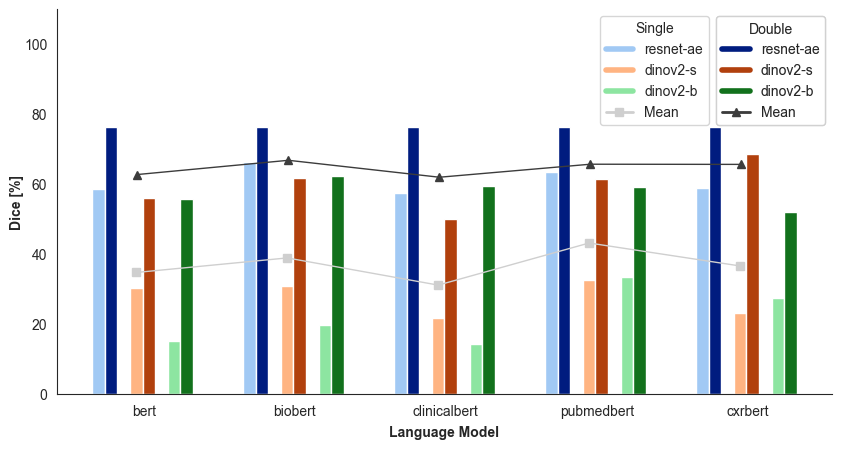

In [285]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.lines import Line2D

# Set the Seaborn style and color palette
sns.set_style("white")
palette1 = sns.color_palette("pastel")
palette2 = sns.color_palette("dark")

# Sample data
# data1 = {
#     'resnet-ae': [58.6, 66.3, 57.4, 63.4, 59.1],
#     'dinov2-s': [30.5, 30.9, 21.7, 32.7, 23.3],
#     'dinov2-b': [15.3, 19.7, 14.5, 33.6, 27.7],
# }
# data2 = {
#     'resnet-ae': [76.6, 65.2, 76.6, 73.2, 75.2],
#     'dinov2-s': [71.3, 71.0, 71.6, 73.1, 71.6],
#     'dinov2-b': [71.3, 74.3, 64.1, 71.7, 69.4],
# }
# index = ['bert', 'biobert', 'clinicalbert', 'pubmedbert', 'cxrbert']
# df1 = pd.DataFrame(data1, index=index)
# df2 = pd.DataFrame(data2, index=index)

df1 = df1_1pct
df2 = df2_1pct

# Assign Seaborn color palettes
colors_table1 = {key: palette1[i] for i, key in enumerate(df1.columns)}
colors_table2 = {key: palette2[i] for i, key in enumerate(df2.columns)}

# Create a new figure and axis
fig, ax = plt.subplots(figsize=(10, 5))

barWidth = 0.25
r1 = np.arange(len(df1)) - 0.3
r2 = [x + barWidth/3 for x in r1]

# Plot the bars using specified colors
for col in df1.columns:
    ax.bar(r1, df1[col], width=barWidth/3, color=colors_table1[col])
    r1 = [x + barWidth for x in r1]
    
for col in df2.columns:
    ax.bar(r2, df2[col], width=barWidth/3, color=colors_table2[col])
    r2 = [x + barWidth for x in r2]

# Adjusting x-axis labels and other attributes
ax.set_xlabel('Language Model', fontweight='bold', labelpad=5)
ax.set_xticks(np.arange(len(df1.index)))
ax.set_xticklabels(list(df1.index))
ax.set_ylabel('Dice [%]', fontweight='bold', labelpad=0)
ax.set_ylim([0, 110])
ax.set_yticks(np.arange(0, 101, 20.0))
# ax.set_yticklabels([str(num) + '.0' for num in np.arange(0, 101, 20)])

# Compute means for Single and Double
mean_single = df1.mean(axis=1)
mean_double = df2.mean(axis=1)

# Convert r1 and r2 to numpy arrays
r1 = np.array(r1)
r2 = np.array(r2)

# Plotting means
ax.plot(r1 - barWidth*2, mean_single, color=palette1[7], marker='s', label='Mean Single', linestyle='-', lw=1)
ax.plot(r2 - barWidth*2.3, mean_double, color=palette2[7], marker='^', label='Mean Double', linestyle='-', lw=1)

# Legends
legend_elements_single = [Line2D([0], [0], color=colors_table1[col], lw=4, label=col) for col in df1.columns]
legend_elements_double = [Line2D([0], [0], color=colors_table2[col], lw=4, label=col) for col in df2.columns]
legend_elements_mean = [Line2D([0], [0], lw=2, label='Mean', marker='s', color=palette1[7]),
                        Line2D([0], [0], lw=2, label='Mean', marker='^', color=palette2[7])]

legend1 = ax.legend(handles=legend_elements_single+legend_elements_mean[:1], loc='upper right', bbox_to_anchor=(0.85, 1.), title="Single")
legend2 = ax.legend(handles=legend_elements_double+legend_elements_mean[1:], loc='upper right', bbox_to_anchor=(1., 1.), title="Double")

ax.add_artist(legend1)
ax.add_artist(legend2)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.savefig('figures/single_double_segment_rsna.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()


In [286]:
task = 'classification_single_layer_and_wrong'
dataset = 'covidx'
metric = 'accuracy'

df1 = construct_df(task, dataset, metric)
df1_1pct = df1.loc[:, df1.columns.get_level_values('data_pct') == "1%"]
df1_1pct.columns = df1_1pct.columns.droplevel(1)
df1_1pct.style.set_caption(f"{task}_{dataset}: {metric}").format("{:.1f}")

vision_backbone,resnet-ae,dinov2-s,dinov2-b
text_encoder,,,
bert,45.8,50.0,54.0
biobert,53.5,53.5,57.0
clinicalbert,49.5,47.0,54.0
pubmedbert,42.8,54.5,48.8
cxrbert,48.2,51.2,55.8


In [287]:
task = 'classification'
dataset = 'covidx'
metric = 'accuracy'

df2 = construct_df(task, dataset, metric)
df2_1pct = df2.loc[:, df2.columns.get_level_values('data_pct') == "1%"]
df2_1pct.columns = df2_1pct.columns.droplevel(1)
df2_1pct.style.set_caption(f"{task}_{dataset}: {metric}").format("{:.1f}")

vision_backbone,resnet-ae,dinov2-s,dinov2-b
text_encoder,,,
bert,62.0,69.7,71.0
biobert,60.3,69.5,67.5
clinicalbert,54.8,66.5,68.8
pubmedbert,50.0,68.3,70.2
cxrbert,60.0,68.8,61.5


d:\Apps\Anaconda3\envs\idv\lib\site-packages\brokenaxes.py:151: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim(ylims[::-1][i // ncols])
d:\Apps\Anaconda3\envs\idv\lib\site-packages\brokenaxes.py:316: UserWarning: FixedFormatter should only be used together with FixedLocator
  result.append(getattr(ax, method)(*args, **kwargs))


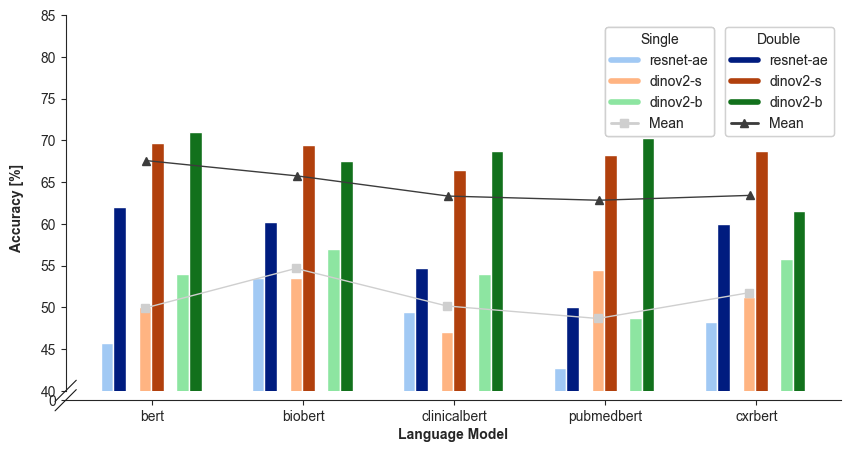

In [288]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from brokenaxes import brokenaxes
from matplotlib.lines import Line2D

# Set the Seaborn style and color palette
sns.set_style("white")
palette1 = sns.color_palette("pastel")
palette2 = sns.color_palette("dark")

# Sample data
# data1 = {
#     'resnet-ae': [45.8, 53.5, 49.5, 45.8, 48.2],
#     'dinov2-s': [50.0, 53.5, 47.0, 54.5, 51.2],
#     'dinov2-b': [54.0, 57.0, 50.0, 48.8, 55.8]
# }
# data2 = {
#     'resnet-ae': [56.2, 52.2, 54.0, 48.8, 49.3],
#     'dinov2-s': [56.0, 56.7, 48.5, 56.5, 53.5],
#     'dinov2-b': [55.3, 64.5, 50.7, 49.8, 57.5]
# }

# index = ['bert', 'biobert', 'clinicalbert', 'pubmedbert', 'cxrbert']
# df1 = pd.DataFrame(data1, index=index)
# df2 = pd.DataFrame(data2, index=index)
df1 = df1_1pct
df2 = df2_1pct

# Assign Seaborn color palettes
colors_table1 = {key: palette1[i] for i, key in enumerate(df1.columns)}
colors_table2 = {key: palette2[i] for i, key in enumerate(df2.columns)}

# Create the broken axes plot
fig = plt.figure(figsize=(10, 5))
bax = brokenaxes(ylims=(((0, 0), (40, 85))), hspace=.05, fig=fig)

barWidth = 0.25
r1 = np.arange(len(df1)) - 0.3
r2 = [x + barWidth/3 for x in r1]

# Plot the bars on the broken axes using specified colors
bars_table1 = []
bars_table2 = []
for col in df1.columns:
    bars_table1.append(bax.bar(r1, df1[col], width=barWidth/3, color=colors_table1[col]))
    r1 = [x + barWidth for x in r1]
    
for col in df2.columns:
    bars_table2.append(bax.bar(r2, df2[col], width=barWidth/3, color=colors_table2[col]))
    r2 = [x + barWidth for x in r2]

# Adjusting x-axis labels and other attributes
# bax.set_title('Comparison of 1% data column from both tables')
bax.set_xlabel('Language Model', fontweight='bold', labelpad=20)
bax.set_xticklabels([''] + list(df1.index))
bax.set_ylabel('Accuracy [%]', fontweight='bold', labelpad=30)
# bax.set_yticks(np.arange(45, 65, 5))

# Create grouped legend
# Legends
legend_elements_single = [Line2D([0], [0], color=colors_table1[col], lw=4, label=col) for col in df1.columns]
legend_elements_double = [Line2D([0], [0], color=colors_table2[col], lw=4, label=col) for col in df2.columns]


# Convert r1 and r2 to numpy arrays
r1 = np.array(r1)
r2 = np.array(r2)
# Compute means for Single and Double
mean_single = df1.mean(axis=1)
mean_double = df2.mean(axis=1)

# Plotting means on the broken axes
bax.plot(r1 - barWidth*2, mean_single, color=palette1[7], marker='s', label='Mean Single', linestyle='-', lw=1)
bax.plot(r2 - barWidth*2.3, mean_double, color=palette2[7], marker='^', label='Mean Double', linestyle='-', lw=1)

# Adjusting x-axis labels and other attributes
# ... [The rest of your code remains unchanged]

# Adding mean legends
legend_elements_mean = [Line2D([0], [0], lw=2, label='Mean', marker='s', color=palette1[7]),
                        Line2D([0], [0], lw=2, label='Mean', marker='^', color=palette2[7])]


legend1 = fig.legend(handles=legend_elements_single+legend_elements_mean[:1], loc='upper right', bbox_to_anchor=(0.78, 0.87), title="Single")
legend2 = fig.legend(handles=legend_elements_double+legend_elements_mean[1:], loc='upper right', bbox_to_anchor=(0.90, 0.87), title="Double")

# Add the legends to the current axes (important to prevent overlap)
plt.gca().add_artist(legend1)


# Add the legends to the current axes (important to prevent overlap)
plt.gca().add_artist(legend1)
plt.gca().add_artist(legend2)

plt.savefig('figures/single_double_clf_covidx.png', dpi=300, bbox_inches='tight',  facecolor='white')
plt.show()

## dummy vs no text embeds

In [6]:
task = 'classification'
dataset = 'covidx_dummy'
metric = 'accuracy'

df2 = construct_df(task, dataset, metric)
df2_1pct = df2.loc[:, df2.columns.get_level_values('data_pct') == "1%"]
df2_1pct.columns = df2_1pct.columns.droplevel(1)
df2_1pct.style.set_caption(f"{task}_{dataset}: {metric}").format("{:.1f}")

vision_backbone,resnet-ae,dinov2-s,dinov2-b
text_encoder,,,
bert,63.0,69.5,69.0
biobert,61.0,66.3,67.3
clinicalbert,57.0,65.2,69.0
pubmedbert,58.0,66.0,66.3
cxrbert,61.0,67.5,66.0


In [7]:
task = 'classification'
dataset = 'covidx'
metric = 'accuracy'

df1 = construct_df(task, dataset, metric)
df1_1pct = df1.loc[:, df1.columns.get_level_values('data_pct') == "1%"]
df1_1pct.columns = df1_1pct.columns.droplevel(1)
df1_1pct.style.set_caption(f"{task}_{dataset}: {metric}").format("{:.1f}")

vision_backbone,resnet-ae,dinov2-s,dinov2-b
text_encoder,,,
bert,62.0,69.7,71.0
biobert,60.3,69.5,67.5
clinicalbert,54.8,66.5,68.8
pubmedbert,50.0,68.3,70.2
cxrbert,60.0,68.8,61.5


In [ ]:
dummy = df2_1pct['resnet-ae']['100%'].values
default = df1_1pct['resnet-ae']['100%'].values

In [24]:
dummy_comparison_df = pd.concat([df1_1pct, df2_1pct], axis=1, keys=['None', 'Dummy'], )
dummy_comparison_df = dummy_comparison_df.reorder_levels([1, 0], axis=1).sort_index(axis=1)
dummy_comparison_df.columns.names = ['Vision Backbone', 'Text input']

dummy_comparison_df = dummy_comparison_df.drop("resnet-ae", axis=1, level=0)

dummy_comparison_df.style.format("{:.1f}")

In [27]:
dummy_comparison_df = dummy_comparison_df.applymap(format_percentage)
latex = dummy_comparison_df.to_latex(escape=False, column_format='c', na_rep='', 
                              label=f"tab:text-input-comparison", longtable=False, position='H',bold_rows=True)
latex = latex_postprocess(latex)
print(latex)

\begin{table}[H]
\label{tab:text-input-comparison}
\begin{tabular}{c}
\toprule
Vision Backbone & \multicolumn{2}{r}{\textbf{DINOv2-B}} & \multicolumn{2}{r}{\textbf{DINOv2-S}} \\
Text input & Dummy & None & Dummy & None \\
\textit{language model} &  &  &  &  \\
\midrule
\textbf{BERT} & 69.0 & 71.0 & 69.5 & 69.7 \\
\textbf{BioBERT} & 67.3 & 67.5 & 66.3 & 69.5 \\
\textbf{ClinicalBERT} & 69.0 & 68.8 & 65.2 & 66.5 \\
\textbf{PubMedBERT} & 66.3 & 70.2 & 66.0 & 68.3 \\
\textbf{CXR-BERT} & 66.0 & 61.5 & 67.5 & 68.8 \\
\bottomrule
\end{tabular}
\end{table}



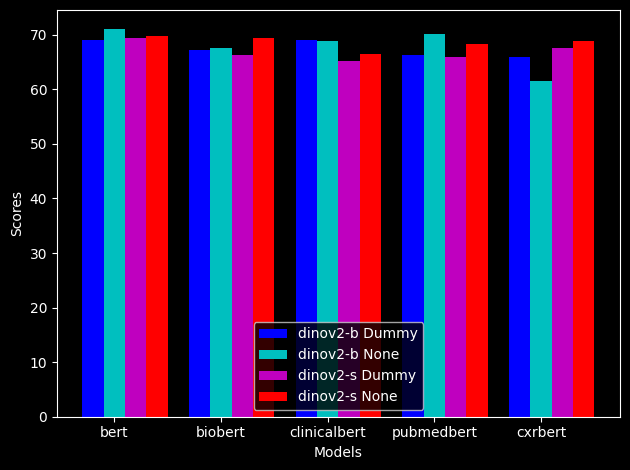

In [25]:
import matplotlib.pyplot as plt
import numpy as np

# Data
models = ['bert', 'biobert', 'clinicalbert', 'pubmedbert', 'cxrbert']
dinov2_b_dummy = [69.0, 67.3, 69.0, 66.3, 66.0]
dinov2_b_none = [71.0, 67.5, 68.8, 70.2, 61.5]
dinov2_s_dummy = [69.5, 66.3, 65.2, 66.0, 67.5]
dinov2_s_none = [69.7, 69.5, 66.5, 68.3, 68.8]

barWidth = 0.2
r1 = np.arange(len(dinov2_b_dummy))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]

# Create bars
plt.bar(r1, dinov2_b_dummy, width=barWidth, label='dinov2-b Dummy', color='b')
plt.bar(r2, dinov2_b_none, width=barWidth, label='dinov2-b None', color='c')
plt.bar(r3, dinov2_s_dummy, width=barWidth, label='dinov2-s Dummy', color='m')
plt.bar(r4, dinov2_s_none, width=barWidth, label='dinov2-s None', color='r')

# General layout
plt.xticks([r + barWidth for r in range(len(dinov2_b_dummy))], models)
plt.ylabel('Scores')
plt.xlabel('Models')
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


## Parameter Comparison

### Classification 

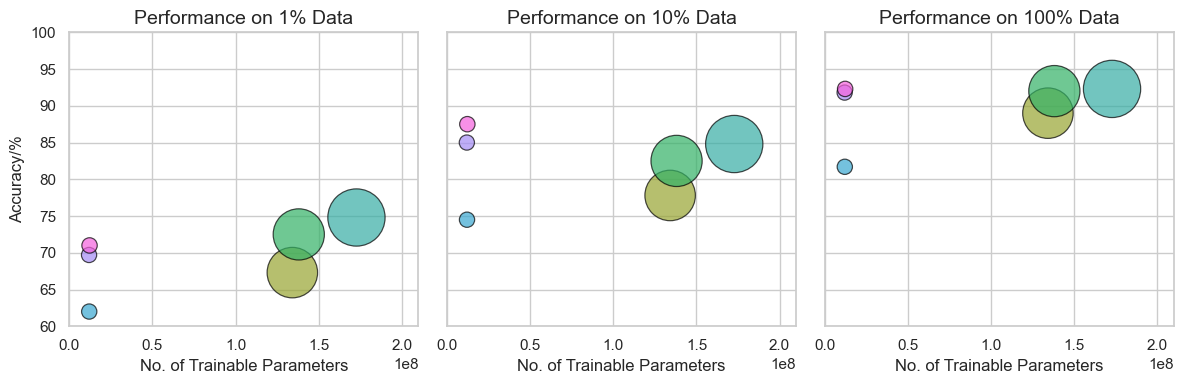

In [151]:
import pandas as pd
import numpy as np


params = pd.read_csv("parameters_comparison_covidx.csv")[:6]
params.iloc[-3:,-3:] = np.array([
    [62.0, 74.5, 81.7], 
    [69.7, 85.0, 91.8], 
    [71.0, 87.5, 92.3]
])


import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Convert 'params' dictionary into a DataFrame
params_df = pd.DataFrame(params)

# Create a 1x3 subplot
fig, ax = plt.subplots(1, 3, figsize=(12, 4), sharey=True)

# Set a more appealing color palette
palette = sns.color_palette("husl", n_colors=8)[2:]

# Set global Seaborn style
sns.set_theme(style='whitegrid')

for j, pct in enumerate([1, 10, 100]):
    # Scatterplot for each percentage
    sns.scatterplot(
        x=params_df['num_trainable_params'],
        y=params_df[f'{pct}%'],
        hue=params_df.index,
        size=params_df['num_trainable_params'],
        sizes=(120, 1700),
        alpha=0.7,
        edgecolor='black',
        palette=palette,
        ax=ax[j],
        legend=False,
    )

    ax[j].set_xlim((0, 2.1*10**8))
    ax[j].set_ylim((60, 100))
    ax[j].set_xlabel('No. of Trainable Parameters', fontsize=12)
    ax[j].set_ylabel(f'Accuracy/%', fontsize=12)
    ax[j].set_title(f'Performance on {pct}% Data', fontsize=14)

# Super title for the entire plot
# fig.suptitle('No. of Trainable Parameters vs Performance', fontsize=16, y=1.02)

plt.tight_layout()
plt.show()
# plt.savefig('figures/trainable_params_vs_performance.png', dpi=300, facecolor='white')


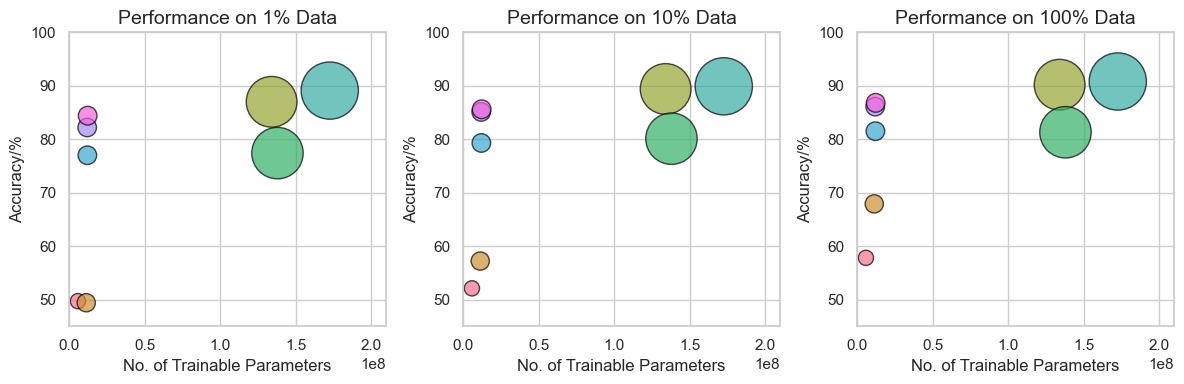

In [153]:
import pandas as pd
import numpy as np


params = pd.read_csv("parameters_comparison.csv")[:8]


import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Convert 'params' dictionary into a DataFrame
params_df = pd.DataFrame(params)

# Create a 1x3 subplot
fig, ax = plt.subplots(1, 3, figsize=(12, 4),)

# Set a more appealing color palette
palette = sns.color_palette("husl", n_colors=len(params_df))

# Set global Seaborn style
sns.set_theme(style='whitegrid')

for j, pct in enumerate([1, 10, 100]):
    # Scatterplot for each percentage
    sns.scatterplot(
        x=params_df['num_trainable_params'],
        y=params_df[f'{pct}%'],
        hue=params_df.index,
        size=params_df['num_trainable_params'],
        sizes=(120, 1700),
        alpha=0.7,
        edgecolor='black',
        palette=palette,
        ax=ax[j],
        legend=False,
    )

    ax[j].set_xlim((0, 2.1*10**8))
    ax[j].set_ylim((45, 100))
    ax[j].set_xlabel('No. of Trainable Parameters', fontsize=12)
    ax[j].set_ylabel(f'Accuracy/%', fontsize=12)
    ax[j].set_title(f'Performance on {pct}% Data', fontsize=14)

# Super title for the entire plot
# fig.suptitle('No. of Trainable Parameters vs Performance', fontsize=16, y=1.02)

plt.tight_layout()
plt.show()
# plt.savefig('figures/trainable_params_vs_performance.png', dpi=300, facecolor='white')


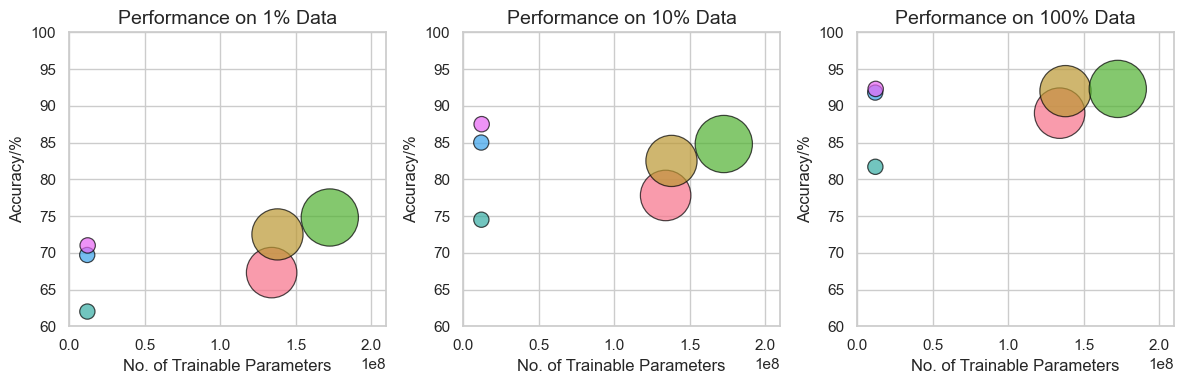

In [144]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Convert 'params' dictionary into a DataFrame
params_df = pd.DataFrame(params)

# Create a 1x3 subplot
fig, ax = plt.subplots(1, 3, figsize=(12, 4),)

# Set a more appealing color palette
palette = sns.color_palette("husl", n_colors=len(params_df))

# Set global Seaborn style
sns.set_theme(style='whitegrid')

for j, pct in enumerate([1, 10, 100]):
    # Scatterplot for each percentage
    sns.scatterplot(
        x=params_df['num_trainable_params'],
        y=params_df[f'{pct}%'],
        hue=params_df.index,
        size=params_df['num_trainable_params'],
        sizes=(120, 1700),
        alpha=0.7,
        edgecolor='black',
        palette=palette,
        ax=ax[j],
        legend=False,
    )

    ax[j].set_xlim((0, 2.1*10**8))
    ax[j].set_ylim((60, 100))
    ax[j].set_xlabel('No. of Trainable Parameters', fontsize=12)
    ax[j].set_ylabel(f'Accuracy/%', fontsize=12)
    ax[j].set_title(f'Performance on {pct}% Data', fontsize=14)

# Super title for the entire plot
# fig.suptitle('No. of Trainable Parameters vs Performance', fontsize=16, y=1.02)

plt.tight_layout()
plt.show()
# plt.savefig('figures/trainable_params_vs_performance.png', dpi=300, facecolor='white')


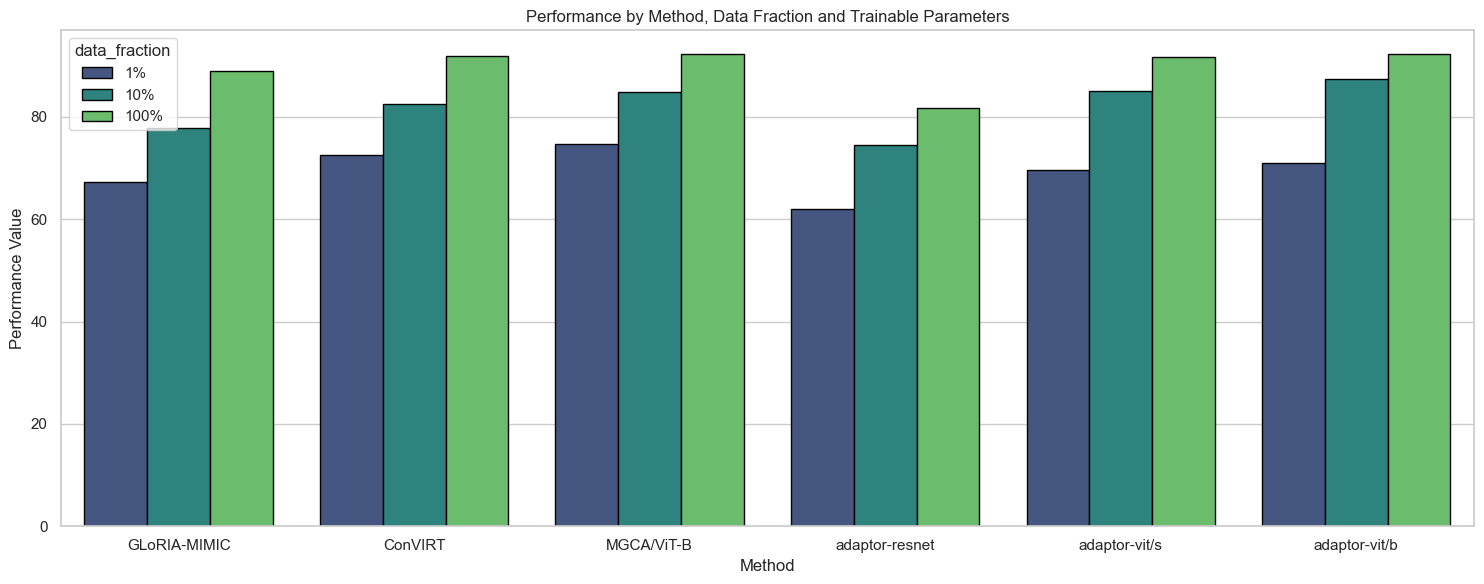

In [107]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Sample data
data = {
    'method': ['GLoRIA-MIMIC', 'ConVIRT', 'MGCA/ViT-B', 'adaptor-resnet', 'adaptor-vit/s', 'adaptor-vit/b'],
    'num_trainable_params': [134178368.0, 138048064.0, 172734208.0, 12011009.0, 11912705.0, 12207617.0],
    '1%': [67.3, 72.5, 74.8, 62.0, 69.7, 71.0],
    '10%': [77.8, 82.5, 84.8, 74.5, 85.0, 87.5],
    '100%': [89.0, 92.0, 92.3, 81.7, 91.8, 92.3]
}

df = pd.DataFrame(data)

# Normalize 'num_trainable_params' for better visual representation
df['normalized_params'] = df['num_trainable_params'] / df['num_trainable_params'].max()

# Melt the dataframe for long format
df_melted = df.melt(id_vars=['method', 'num_trainable_params', 'normalized_params'], 
                    value_vars=['1%', '10%', '100%'], 
                    var_name='data_fraction', 
                    value_name='performance')

# Create the plot
plt.figure(figsize=(15, 6))

# Bar plot using hue for data fractions and size/color for trainable params
sns.barplot(data=df_melted, x='method', hue='data_fraction', y='performance', 
            palette='viridis', edgecolor='black', 
            dodge=True,  # To have separate bars for each data_fraction
            # size='normalized_params',  # Adjust the size based on normalized_params
            # sizes=(10, 100)  # This scales the size of the bars
           )

plt.title('Performance by Method, Data Fraction and Trainable Parameters')
plt.ylabel('Performance Value')
plt.xlabel('Method')

# Optional: Place a legend for the size if needed
# plt.legend(title='Trainable Parameters', loc='upper left')

plt.tight_layout()
plt.show()


In [73]:
# Melt the dataframe for a long format suitable for Seaborn
melted_df = params_df.melt(id_vars=['num_trainable_params'], value_vars=['1%', '10%', '100%'], 
                           var_name='Percentage', value_name='Accuracy')

# Adjust the size mapping
size_map = {'1%': 50, '10%': 200, '100%': 500}
melted_df['size'] = melted_df['Percentage'].map(size_map)

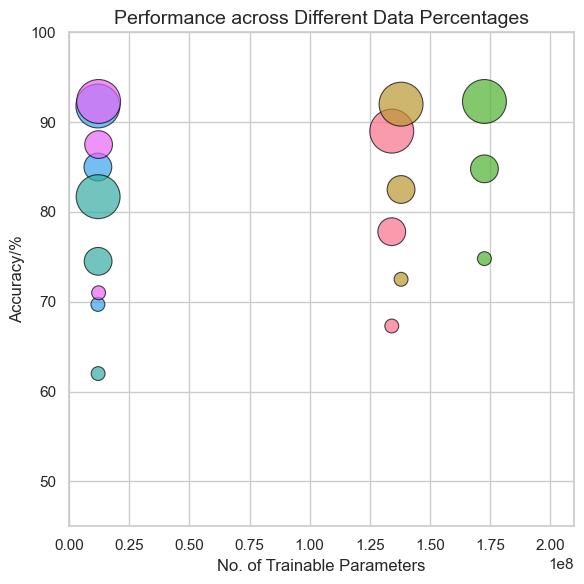

In [77]:

# Create a single plot
fig, ax = plt.subplots(figsize=(6, 6))

# Set a more appealing color palette
palette = sns.color_palette("husl", n_colors=len(params_df))

sns.scatterplot(
    x=melted_df['num_trainable_params'],
    y=melted_df['Accuracy'],
    hue=melted_df.index % len(params_df),  # for consistent coloring across percentages
    size=melted_df['size'],
    sizes=(100, 1000),  # to directly use the sizes without any scaling
    alpha=0.7,
    edgecolor='black',
    palette=palette,
    ax=ax
)

ax.set_xlim((0, 2.1*10**8))
ax.set_ylim((45, 100))
ax.set_xlabel('No. of Trainable Parameters', fontsize=12)
ax.set_ylabel('Accuracy/%', fontsize=12)
ax.set_title('Performance across Different Data Percentages', fontsize=14)
ax.get_legend().remove()  # if you don't want to show the legend

plt.tight_layout()
plt.show()


In [83]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Your data
data = {
    'method': ['GLoRIA-MIMIC', 'ConVIRT', 'MGCA/ViT-B', 'adaptor-resnet', 'adaptor-vit/s', 'adaptor-vit/b'],
    'num_params': [134178368.0, 138048064.0, 172734208.0, 152613697.0, 143451521.0, 208270337.0],
    'num_trainable_params': [134178368.0, 138048064.0, 172734208.0, 12011009.0, 11912705.0, 12207617.0],
    '1%': [67.3, 72.5, 74.8, 62.0, 69.7, 71.0],
    '10%': [77.8, 82.5, 84.8, 74.5, 85.0, 87.5],
    '100%': [89.0, 92.0, 92.3, 81.7, 91.8, 92.3]
}

df = pd.DataFrame(data)

# Melt the DataFrame
melted_df = df.melt(id_vars=['method', 'num_trainable_params'], value_vars=['1%', '10%', '100%'], var_name='percentage', value_name='performance')

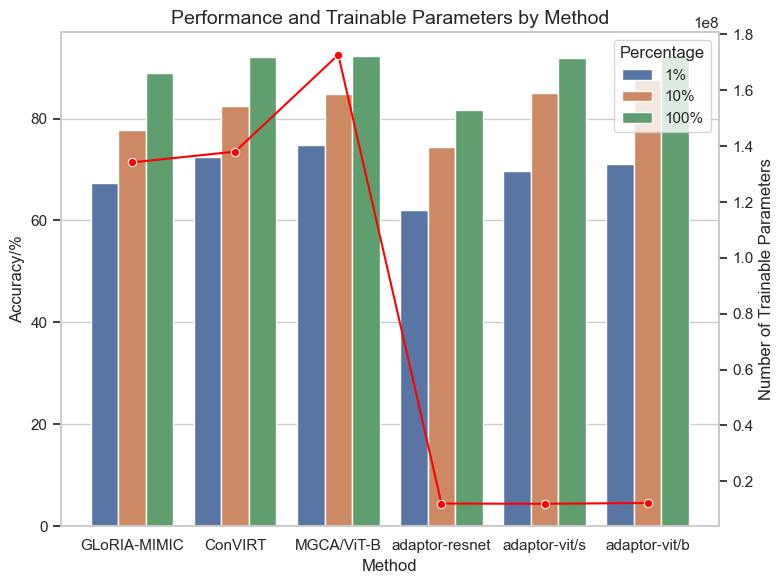

In [93]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Your dataset
data = {
    'method': ['GLoRIA-MIMIC', 'ConVIRT', 'MGCA/ViT-B', 'adaptor-resnet', 'adaptor-vit/s', 'adaptor-vit/b'],
    'num_params': [134178368.0, 138048064.0, 172734208.0, 152613697.0, 143451521.0, 208270337.0],
    'num_trainable_params': [134178368.0, 138048064.0, 172734208.0, 12011009.0, 11912705.0, 12207617.0],
    '1%': [67.3, 72.5, 74.8, 62.0, 69.7, 71.0],
    '10%': [77.8, 82.5, 84.8, 74.5, 85.0, 87.5],
    '100%': [89.0, 92.0, 92.3, 81.7, 91.8, 92.3]
}

df = pd.DataFrame(data)

# Melt the dataframe to get it in long format
df_melted = df.melt(id_vars=['method', 'num_params', 'num_trainable_params'], 
                    value_vars=['1%', '10%', '100%'], 
                    var_name='Percentage', 
                    value_name='Accuracy')

# Create the plot
fig, ax1 = plt.subplots(figsize=(8, 6))

# Plot the bars
sns.barplot(data=df_melted, x='method', hue='Percentage', y='Accuracy', ax=ax1)
ax1.set_ylabel('Accuracy/%', fontsize=12)
ax1.set_xlabel('Method', fontsize=12)
ax1.set_title('Performance and Trainable Parameters by Method', fontsize=14)

# Overlay with a line plot for num_trainable_params
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
sns.lineplot(data=df, x='method', y='num_trainable_params', ax=ax2, color='red', marker='o')
ax2.set_ylabel('Number of Trainable Parameters', fontsize=12)

# Display the plot
plt.grid(False)
plt.tight_layout()
plt.show()


### Segmentation - rsna

In [7]:
import pandas as pd
params = pd.read_csv("segmentation_param_comparison-rsna.csv")[:5]
params

,method,num_trainable_params_downstream,num_trainable_params_pretrain,1%,10%,100%
0,GLoRIA-MIMIC,9013073.0,134178368.0,37.4,57.1,64.0
1,MGCA/ResNet50,9013073.0,113589312.0,49.7,59.3,64.2
2,adaptor-vit/s-pubmedbert,10401409.0,11912705.0,63.5,75.1,76.9
3,adaptor-vit/b-pubmedbert,10401409.0,12207617.0,60.2,75.8,77.3
4,adaptor-resnet-pubmedbert,20146817.0,12011009.0,73.2,76.5,76.3


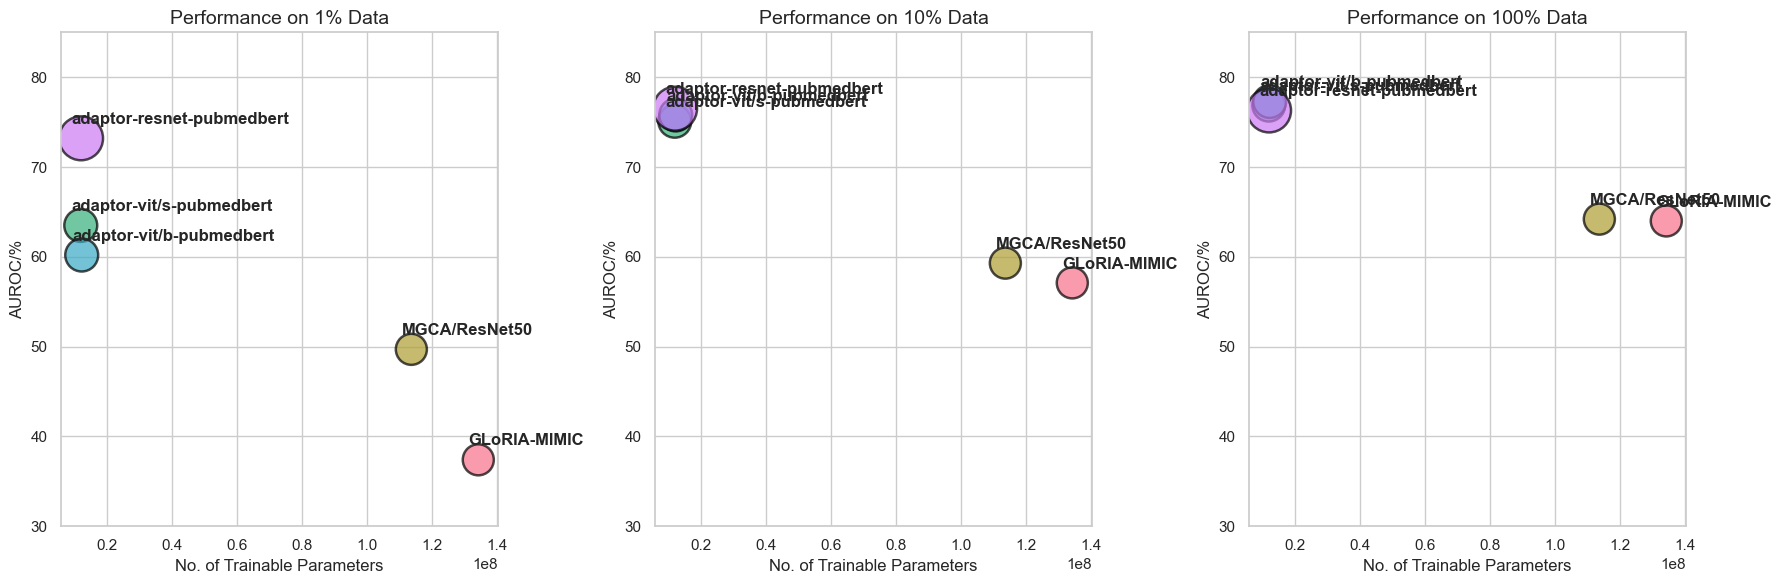

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Convert 'params' dictionary into a DataFrame
params_df = pd.DataFrame(params)

# Create a 1x3 subplot
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

# Set a more appealing color palette
palette = sns.color_palette("husl", n_colors=len(params_df))

# Set global Seaborn style
sns.set_theme(style='whitegrid')

for j, pct in enumerate([1, 10, 100]):
    # Scatterplot for each percentage
    sns.scatterplot(
        x=params_df['num_trainable_params_pretrain'],
        y=params_df[f'{pct}%'],
        hue=params_df.index,
        size=params_df['num_trainable_params_downstream'],
        sizes=(500, 1000),
        alpha=0.7,
        edgecolor='black',
        palette=palette,
        ax=ax[j],
        legend=False,
    )

    for i in range(len(params_df)):
        x_offset = -3e6
        y_offset = 1.6
        # y_offset = -2 if params_df['method'][i] == 'adaptor-vit/s' else 1.6
        ax[j].annotate(params_df['method'][i], 
                       (params_df['num_trainable_params_pretrain'][i] + x_offset, params_df[f'{pct}%'][i] + y_offset), 
                       fontsize=12, fontweight='bold')

    # ax[j].set_xlim((0, 2.1*10**8))
    ax[j].set_ylim((30, 85))
    ax[j].set_xlabel('No. of Trainable Parameters', fontsize=12)
    ax[j].set_ylabel(f'AUROC/%', fontsize=12)
    ax[j].set_title(f'Performance on {pct}% Data', fontsize=14)

# Super title for the entire plot
# fig.suptitle('No. of Trainable Parameters vs Performance', fontsize=16, y=1.02)

plt.tight_layout()
# plt.show()
plt.savefig('trainable_params_vs_performance.png', dpi=300, facecolor='white')


## Performance Comparison

In [171]:
perf = pd.read_csv("performance_comparison.csv", skiprows=1)
perf.replace('-', np.nan, inplace=True)

columns = pd.MultiIndex.from_tuples([
    ('Method', ''),
    ('RSNA (AUC)', '1%'),
    ('RSNA (AUC)', '10%'),
    ('RSNA (AUC)', '100%'),
    ('COVIDx (ACC)', '1%'),
    ('COVIDx (ACC)', '10%'),
    ('COVIDx (ACC)', '100%'),
])

# Assign the new column index and set the index to be the 'Method' column
perf.columns = columns
perf.set_index('Method', inplace=True)

# Show the DataFrame
perf

RSNA (AUC)             COVIDx (ACC)            
                                     1%   10%  100%           1%   10%  100%
Method                                                                      
Random Init                        58.9  69.4  74.1         50.5  60.3    70
ImageNet Init                      74.9  74.5  76.3         64.8  78.8  86.3
DSVE engilberge2018dsve            49.7  52.1  57.8          NaN   NaN   NaN
VSE++ faghri2017vse++              49.4  57.2  67.9          NaN   NaN   NaN
GLoRIA huang2021gloria             86.1  88.0  88.6         67.3  77.8    89
ConVIRT zhang2020contrastive       77.4  80.1  81.3         72.5  82.5    92
GLoRIA-MIMIC huang2021gloria       87.0  89.4  90.2         66.5  80.5  88.8
MGCA(ResNet-50)                    88.6  89.1  89.9           72  83.5  90.5
MGCA(ViT-B/16)                     89.1  89.9  90.8         74.8  84.8  92.3
Adaptor                            84.4  85.6  86.8           71  87.5  92.3

In [172]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Your dataframe is named `perf`
# Splitting the dataframe based on the top level columns
df_rsna = perf['RSNA (AUC)']
df_covid = perf['COVIDx (ACC)'].dropna()  # Drop rows with NaN values for COVIDx
df_covid = df_covid.astype(float)  # Convert the values to float

In [171]:
from torchvision.models import resnet50, ResNet50_Weights
resnet50_model = resnet50(weights=ResNet50_Weights.IMAGENET1K_V2)

def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

count_parameters(resnet50_model)

Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to C:\Users\holaj/.cache\torch\hub\checkpoints\resnet50-11ad3fa6.pth
100%|██████████| 97.8M/97.8M [00:07<00:00, 13.2MB/s]


25557032

In [175]:
pd.read_csv("parameters_comparison.csv")

,method,num_params,num_trainable_params,1%,10%,100%
0,DSVE,126654208,5762400,49.7,52.1,57.8
1,VSE++,11270600,11270600,49.4,57.2,67.9
2,GLoRIA-MIMIC,134178368,134178368,87.0,89.4,90.2
3,ConVIRT,138048064,138048064,77.4,80.1,81.3
4,MGCA/ViT-B,172734208,172734208,89.1,89.9,90.8
5,adaptor-resnet,152613697,12011009,77.0,79.3,81.5
6,adaptor-vit/s,143451521,11912705,82.2,85.1,86.1
7,adaptor-vit/b,208270337,12207617,84.4,85.6,86.8


In [174]:
params = pd.read_csv("parameters_comparison.csv")[:8]

methods = params['method'].to_list()
methods[-3:] = ['Adaptor/ResNet', 'Adaptor/ViT-S','Adaptor/ViT-B']
params['method'] = methods

df = {'method':['Random Init', 'ImageNet Init'], 'num_trainable_params':[25557032, 25557033], 'num_params':[25557032, 25557033], }
params = pd.concat([pd.DataFrame(df), params], ignore_index=True)
params

,method,num_trainable_params,num_params,1%,10%,100%
0,Random Init,25557032,25557032,NaN,NaN,NaN
1,ImageNet Init,25557033,25557033,NaN,NaN,NaN
2,DSVE,5762400,126654208,49.7,52.1,57.8
3,VSE++,11270600,11270600,49.4,57.2,67.9
4,GLoRIA-MIMIC,134178368,134178368,87.0,89.4,90.2
5,ConVIRT,138048064,138048064,77.4,80.1,81.3
6,MGCA/ViT-B,172734208,172734208,89.1,89.9,90.8
7,Adaptor/ResNet,12011009,152613697,77.0,79.3,81.5
8,Adaptor/ViT-S,11912705,143451521,82.2,85.1,86.1
9,Adaptor/ViT-B,12207617,208270337,84.4,85.6,86.8


In [10]:
df_rsna.index = pd.Index(
    ["Random Init", "ImageNet Init", "DSVE", "VSE++", "GLoRIA", "ConVIRT", "GLoRIA-MIMIC", "MGCA/ResNet", "MGCA/ViT-B", "Adaptor/ViT-S"], 
    name="Method", 
)

df_covid.index = pd.Index(
    ["Random Init", "ImageNet Init", "GLoRIA", "ConVIRT", "GLoRIA-MIMIC", "MGCA-ResNet", "MGCA/ViT-B", "Adaptor/ViT-S"], 
    name="Method", 
)

C:\Users\holaj\AppData\Local\Temp\ipykernel_20312\3079838347.py:69: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels(yticklabels, color=alt_colour)


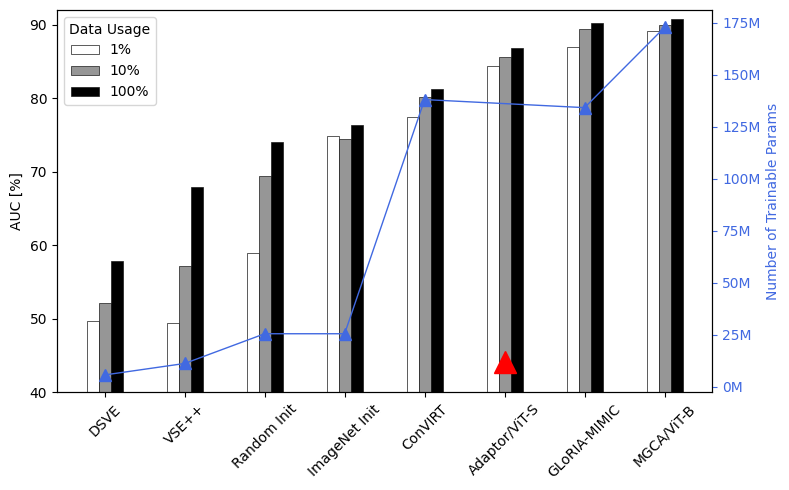

In [155]:
import matplotlib.pyplot as plt
import numpy as np

def plot_data_with_line(df, title, params_df, alt_colour='dimgray'):
    df = df.melt(value_name='Score', var_name='Data Usage', ignore_index=False).reset_index()
    fig, ax1 = plt.subplots(figsize=(8, 5))

    plt.style.use('default')

    # Merge with params to ensure ordering is correct and drop NAs
    merged_df = pd.merge(df, params_df, left_on='Method', right_on='method', how='inner').dropna(subset=['num_trainable_params'])

    # Create custom order for 'Method' to move the last group to the 4th position from the right
    methods_order = list(merged_df['Method'].unique())
    last_method = methods_order.pop(-1)
    methods_order.insert(-2, last_method)
    methods_order = methods_order[2:4] + methods_order[0:2] + methods_order[4:]
    
    # Sort merged_df based on custom order
    merged_df['Method'] = pd.Categorical(merged_df['Method'], categories=methods_order, ordered=True)
    merged_df = merged_df.sort_values('Method')

    # Generate a list of unique colors based on the unique 'Data Usage' values
    unique_data_usage = merged_df['Data Usage'].unique()
    cmap = plt.get_cmap('Greys', len(unique_data_usage))
    colors = cmap(np.arange(len(unique_data_usage)))

    # Bar Plot
    bar_width = 0.15  
    indices = np.arange(len(methods_order))
    offset = -bar_width
    for i, usage in enumerate(unique_data_usage[::-1]):
        scores = merged_df[merged_df['Data Usage'] == usage]['Score']
        ax1.bar(indices + offset, scores, width=bar_width, color=colors[i], edgecolor='k', linewidth=0.5, label=usage)
        offset += bar_width
        
    ax1.set_xticks(indices)
    ax1.set_xticklabels(methods_order, rotation=45)

    ax1.legend(loc="upper left", title="Data Usage",)

    # Line Plot
    ax2 = ax1.twinx()
    y = merged_df['num_trainable_params'].unique()
    # Plot all values excluding the 6th one
    y_without_outlier = [y[i] for i in range(len(y)) if i != 5]
    indices_without_outlier = [indices[i] for i in range(len(indices)) if i != 5]
    ax2.plot(indices_without_outlier, y_without_outlier, marker='^', color=alt_colour, linewidth=1, 
             markersize=8, linestyle='-', label='No. of Trainable Params')

    # Plot the 6th point separately as an outlier
    outlier_color = 'red'  # choose a color for the outlier
    ax2.plot(indices[5], y[5], '^', color=outlier_color, label='Outlier', markersize=16)
    # ax2.hlines(y[5], indices[5], indices[5]+2.4, color=outlier_color, linewidth=1, linestyle='--')

    if title == 'RSNA (AUC)':
        ax1.set_ylabel('AUC [%]')
    else:
        ax1.set_ylabel('ACC [%]')
    ax2.set_ylabel('Number of Trainable Params', color=alt_colour)
    # ax1.set_xlabel('Methods')
    
    ax1.set_ylim(40, 92)

    # Set the color of the y-axis title for the line plot to match the line color
    yticklabels = list(ax2.get_yticks()/10**6)
    yticklabels = [f'{int(label)}M' for label in yticklabels]
    ax2.yaxis.label.set_color(alt_colour)
    ax2.set_yticklabels(yticklabels, color=alt_colour)
    ax2.tick_params(axis='y', colors=alt_colour)

    plt.grid(False)

plot_data_with_line(df_rsna, 'RSNA (AUC)', params, alt_colour='royalblue')
plt.tight_layout()
plt.savefig('figures/rsna_performance_parameters.png', dpi=300, bbox_inches='tight')
plt.show()

## Dice loss comparison

In [189]:
task = 'segment'
dataset = 'siim_original_dice'
metric = 'dice'

orig_df = construct_df(task, dataset)
orig_df.style.set_caption(f"{task}_{dataset}: {metric}").format("{:.1f}")

In [190]:
task = 'segment'
dataset = 'siim'
metric = 'dice'

df = construct_df(task, dataset)
df.style.set_caption(f"{task}_{dataset}: {metric}").format("{:.1f}")

In [210]:
original_dice_loss = orig_df['resnet-ae']['100%'].values
modified_dice_loss = df['resnet-ae']['100%'].values
labels = ['bert', 'biobert', 'clinicalbert', 'pubmedbert', 'cxrbert']
dice_loss_df = pd.DataFrame({'original_dice_loss': original_dice_loss, 'modified_dice_loss': modified_dice_loss}, index=labels)
dice_loss_df = dice_loss_df.applymap(format_percentage)
dice_loss_df.columns = ['Original Dice Loss', 'Modified Dice Loss']
latex = dice_loss_df.to_latex(escape=False, column_format='c', na_rep='', 
                              label=f"tab:dice-loss-comparison", longtable=False, position='H',bold_rows=True)
latex = latex_postprocess(latex)
print(latex)

\begin{table}[H]
\label{tab:dice-loss-comparison}
\begin{tabular}{c}
\toprule
 & Original Dice Loss & Modified Dice Loss \\
\midrule
\textbf{BERT} & 67.9 & 73.0 \\
\textbf{BioBERT} & 68.1 & 73.1 \\
\textbf{ClinicalBERT} & 67.4 & 73.1 \\
\textbf{PubMedBERT} & 67.0 & 73.1 \\
\textbf{CXR-BERT} & 71.3 & 73.1 \\
\bottomrule
\end{tabular}
\end{table}



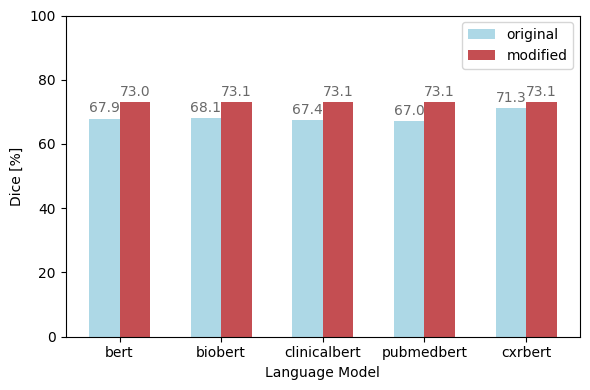

In [241]:
import numpy as np
import matplotlib.pyplot as plt

# Data
original_dice_loss = orig_df['resnet-ae']['100%'].values
modified_dice_loss = df['resnet-ae']['100%'].values
labels = ['bert', 'biobert', 'clinicalbert', 'pubmedbert', 'cxrbert']

# Bar width and positions
width = 0.3
ind = np.arange(len(labels))

# Create the bar plot
plt.style.use('default')
plt.figure(figsize=(6, 4))
original_bars = plt.bar(ind - width/2, original_dice_loss, width, color='lightblue', label='original')
modified_bars = plt.bar(ind + width/2, modified_dice_loss, width, color='r', label='modified')

# Label the y-axis and add a title, xticks and legend
plt.xlabel('Language Model')
plt.ylabel('Dice [%]')
plt.xticks(ind, labels, rotation=0, fontname="Sans")
plt.legend()

# Setting Y-limit
plt.ylim(0, 100)

# Annotate bars with their respective values
def annotate_bars(bars):
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, height + 1, '{:.1f}'.format(height), 
                 ha='center', va='bottom', color='dimgrey', fontsize=10)

annotate_bars(original_bars)
annotate_bars(modified_bars)

# Display the plot
plt.tight_layout()
plt.savefig('figures/dice_loss_comparison_resnet_alldata.png', dpi=300, facecolor='white')
plt.show()


### Hyperparameters

In [12]:
import pandas as pd

# Column levels
tasks = ['Segmentation', 'Segmentation', 'Classification', 'Classification']
datasets = ['SIIM', 'RSNA', 'COVIDx', 'RSNA']

# Multi-index columns
multi_col = pd.MultiIndex.from_tuples(list(zip(tasks, datasets)), names=['Task', 'Dataset'])

# Index and data
index = ['batch size', 'learning rate', 'weight decay', 'max epochs', 'Cosine annealing learning rate scheduler']
data = [
    [4, 4, 512, '128/512/512'],
    ['5e-4', '5e-4', '5e-4/5e-4/1e/4', '5e-5'],
    ['1e-4', '1e/4', '0.05/1e-4', '1e-4'],
    [100, 100, 100, 100],
    ['Yes', 'Yes', 'Yes', 'Yes']
]

# Create DataFrame
df = pd.DataFrame(data, index=index, columns=multi_col)

# Assigning the name "Hyperparameters" to the index
df.index.name = "Hyperparameters"
df


Task                                     Segmentation        Classification   
Dataset                                          SIIM  RSNA          COVIDx   
Hyperparameters                                                               
batch size                                          4     4             512  \
learning rate                                    5e-4  5e-4  5e-4/5e-4/1e/4   
weight decay                                     1e-4  1e/4       0.05/1e-4   
max epochs                                        100   100             100   
Cosine annealing learning rate scheduler          Yes   Yes             Yes   

Task                                                   
Dataset                                          RSNA  
Hyperparameters                                        
batch size                                128/512/512  
learning rate                                    5e-5  
weight decay                                     1e-4  
max epochs                                        100  
Cosine annealing learning rate scheduler          Yes

In [17]:
latex = df.to_latex(escape=False, multicolumn_format='c', multicolumn=True, na_rep='', 
                    caption=f"Hyperparameters for segmentation and classification tasks across 3 datasets.", 
                    label=f"tab:hyperparams-full", 
                    longtable=False, position='H', bold_rows=True)

# Modify the output for tabularx and centered columns
latex = latex.replace('begin{tabular}', 'begin{tabularx}{\\textwidth}')
latex = latex.replace('end{tabular}', 'end{tabularx}')
latex = latex.replace('{lllll}', '{l|*{4}{>{\\centering\\arraybackslash}X}}')

print(latex)


\begin{table}[htbp]
\caption{Hyperparameters for segmentation and classification tasks across 3 datasets.}
\label{tab:hyperparams-full}
\begin{tabularx}{\textwidth}{l|*{4}{>{\centering\arraybackslash}X}}
\toprule
Task & \multicolumn{2}{c}{Segmentation} & \multicolumn{2}{c}{Classification} \\
Dataset & SIIM & RSNA & COVIDx & RSNA \\
Hyperparameters &  &  &  &  \\
\midrule
\textbf{batch size} & 4 & 4 & 512 & 128/512/512 \\
\textbf{learning rate} & 5e-4 & 5e-4 & 5e-4/5e-4/1e/4 & 5e-5 \\
\textbf{weight decay} & 1e-4 & 1e/4 & 0.05/1e-4 & 1e-4 \\
\textbf{max epochs} & 100 & 100 & 100 & 100 \\
\textbf{Cosine annealing learning rate scheduler} & Yes & Yes & Yes & Yes \\
\bottomrule
\end{tabularx}
\end{table}

